<a href="https://colab.research.google.com/github/Jinwooseol/Deep-learning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신경망 학습
Simple 신경망 구현: Logic Gate


In [2]:
#필요한 모듈 import
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Hyper parameter
- Epochs: 반복 횟수
- Learning rate: 변화정도

In [3]:
epochs = 1000
lr = 0.1

In [6]:
#Util Functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def MSE(pred_y, true_y):   # Mean Squared Error
  return (np.sum(true_y - pred_y)**2) / pred_y.shape[0]

def CEE(pred_y, true_y):        # Cross Entropy Error
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + delta))

def CEE_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def CEE_for_bin(pred_y, true_y):  #Cross Entropy Error for binary
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential(f, x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]
    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value

#신경망

In [12]:
class LogicGateNet():

  def __init__(self):
    def weight_init():  # weights, bias initialization
      np.random.seed(1)
      weights = np.random.randn(2)
      bias = np.random.randn(1)

      return weights, bias

    self.weights, self.bias = weight_init()

  def predict(self, x):
    W = self.weights.reshape(-1, 1)
    b = self.bias

    pred_y = sigmoid(np.dot(x, W) + b)
    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return CEE_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grad_W = differential(loss_grad, self.weights)
    grad_B = differential(loss_grad, self.bias)

    return grad_W, grad_B

#AND Gate

In [49]:
# Model 생성 및 학습
AND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X, Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, AND.weights, AND.bias))

Epoch: 100, Cost: 0.6577750894433896, Weights: [1.67482908 0.88530433], Bias: [-2.28862113]
Epoch: 200, Cost: 0.47868977133966595, Weights: [2.09135904 1.77863168], Bias: [-3.18138225]
Epoch: 300, Cost: 0.38199016604274594, Weights: [2.48831035 2.35058578], Bias: [-3.87281609]
Epoch: 400, Cost: 0.3187565601477237, Weights: [2.84364946 2.77715285], Bias: [-4.4409907]
Epoch: 500, Cost: 0.2734944624920833, Weights: [3.15762639 3.12296452], Bias: [-4.9246414]
Epoch: 600, Cost: 0.23932824253066776, Weights: [3.43596333 3.41670603], Bias: [-5.34611966]
Epoch: 700, Cost: 0.21258557987441473, Weights: [3.68466966 3.67338294], Bias: [-5.71968047]
Epoch: 800, Cost: 0.1910811613144657, Weights: [3.90883856 3.90191691], Bias: [-6.05506817]
Epoch: 900, Cost: 0.17341918260176764, Weights: [4.11255132 4.10813902], Bias: [-6.35928329]
Epoch: 1000, Cost: 0.15866164667676708, Weights: [4.29903862 4.29613042], Bias: [-6.63754517]


# Predict Test

In [48]:
print(AND.predict(X))

[[0.00130853]
 [0.0877506 ]
 [0.08798368]
 [0.87627557]]


#OR Gate

In [50]:
OR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_2 = np.array([[0], [1], [1], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X, Y_2)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_B

  loss = OR.loss(X, Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, OR.weights, OR.bias))

Epoch: 100, Cost: 0.46966462715458934, Weights: [2.54994249 1.53146817], Bias: [-0.23756388]
Epoch: 200, Cost: 0.3266420878925113, Weights: [3.0654972  2.48433435], Bias: [-0.73035494]
Epoch: 300, Cost: 0.24939860658163646, Weights: [3.51580354 3.15251285], Bias: [-1.07599499]
Epoch: 400, Cost: 0.2010254578313214, Weights: [3.90753746 3.66348045], Bias: [-1.33653642]
Epoch: 500, Cost: 0.16790857594726685, Weights: [4.24924729 4.07584073], Bias: [-1.5458389]
Epoch: 600, Cost: 0.14386201735355925, Weights: [4.54980861 4.42109728], Bias: [-1.72093619]
Epoch: 700, Cost: 0.12564774324952763, Weights: [4.81676763 4.71787029], Bias: [-1.87147318]
Epoch: 800, Cost: 0.11140046771464229, Weights: [5.05614319 4.97800846], Bias: [-2.0034682]
Epoch: 900, Cost: 0.09996929350126772, Weights: [5.27265436 5.20949965], Bias: [-2.12094969]
Epoch: 1000, Cost: 0.09060611328418659, Weights: [5.47000342 5.41797969], Bias: [-2.22675613]


# Predict Test

In [18]:
print(OR.predict(X))

[[0.09737338]
 [0.96050267]
 [0.9624297 ]
 [0.99982686]]


#NAND Gate

In [51]:
# Model 생성 및 학습
NAND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_3 = np.array([[1], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = NAND.get_gradient(X, Y_3)

  NAND.weights -= lr * grad_W
  NAND.bias -= lr * grad_B

  loss = NAND.loss(X, Y_3)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.weights, NAND.bias))

Epoch: 100, Cost: 0.824288748305992, Weights: [-0.40813162 -1.15743385], Bias: [1.62622569]
Epoch: 200, Cost: 0.5578027743859468, Weights: [-1.46187375 -1.73868146], Bias: [2.70926709]
Epoch: 300, Cost: 0.42989582787243724, Weights: [-2.10463937 -2.21939554], Bias: [3.50143234]
Epoch: 400, Cost: 0.3513789539649579, Weights: [-2.57292664 -2.62562358], Bias: [4.13292997]
Epoch: 500, Cost: 0.2972825383968322, Weights: [-2.94747465 -2.97382709], Bias: [4.66077837]
Epoch: 600, Cost: 0.25748055791697105, Weights: [-3.26268809 -3.27683177], Bias: [5.11516759]
Epoch: 700, Cost: 0.22689955273940252, Weights: [-3.53617405 -3.54422649], Bias: [5.51431484]
Epoch: 800, Cost: 0.20265540741223503, Weights: [-3.77827069 -3.78308875], Bias: [5.87021703]
Epoch: 900, Cost: 0.1829670479710293, Weights: [-3.99567763 -3.99868484], Bias: [6.19126741]
Epoch: 1000, Cost: 0.1666679983329244, Weights: [-4.19305086 -4.19499713], Bias: [6.48360098]


#Predict Test

In [20]:
print(NAND.predict(X))

[[0.99847403]
 [0.90792881]
 [0.90809137]
 [0.12960599]]


#XOR Gate

In [52]:
# Model 생성 및 학습
XOR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_4 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = XOR.get_gradient(X, Y_4)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_B

  loss = XOR.loss(X, Y_4)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, Cost: 1.4066709266956385, Weights: [ 0.55458224 -0.1127766 ], Bias: [-0.26306006]
Epoch: 200, Cost: 1.3887878884306644, Weights: [0.19613306 0.00555485], Bias: [-0.11966087]
Epoch: 300, Cost: 1.3866676758126297, Weights: [0.07299372 0.01879835], Bias: [-0.0544414]
Epoch: 400, Cost: 1.386360043466884, Weights: [0.02858176 0.01317575], Bias: [-0.02476527]
Epoch: 500, Cost: 1.3863070165433458, Weights: [0.01168694 0.00730766], Bias: [-0.01126515]
Epoch: 600, Cost: 1.386296904064606, Weights: [0.00494248 0.00369764], Bias: [-0.0051242]
Epoch: 700, Cost: 1.3862948811673228, Weights: [0.00214199 0.00178814], Bias: [-0.00233085]
Epoch: 800, Cost: 1.3862944682279597, Weights: [0.00094414 0.00084356], Bias: [-0.00106023]
Epoch: 900, Cost: 1.3862943832414318, Weights: [0.00042088 0.00039229], Bias: [-0.00048227]
Epoch: 1000, Cost: 1.3862943656937712, Weights: [0.00018901 0.00018088], Bias: [-0.00021937]


#Predict Test

In [41]:
print(XOR.predict(X))

[[0.49994516]
 [0.49999038]
 [0.49999241]
 [0.50003763]]


XOR은 loss (cost)가 일정 이하로 감소하지 않는다.
-> 학습이 제대로 진행되지 않음

따라서, XOR은 two-layer 신경망으로 구성
- 얕은 신경망 (Shallow Neural Network)
- 두 논리게이트 (NAND, OR)를 통과시키고 AND gate로 합쳐서 구현

In [53]:
s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1, s2]).T.reshape(-1, 2)

# Predict Test

In [55]:
print(AND.predict(X_2))

[[0.12711207]
 [0.80093056]
 [0.80235811]
 [0.14368961]]


#Two-layer Neural Network으로 XOR Gate 구현
- Class 구현

In [60]:
class XORNet():

  def __init__(self):
    np.random.seed(1)

    def weight_init():
      params = {}
      params['w_1'] = np.random.randn(2)
      params['b_1'] = np.random.randn(2)
      params['w_2'] = np.random.randn(2)
      params['b_2'] = np.random.randn(1)
      return params

    self.params = weight_init()

  def predict(self, x):
    W_1, W_2 = self.params['w_1'].reshape(-1, 1), self.params['w_2'].reshape(-1, 1)
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W_2) + B_2
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return CEE_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grads = {}
    grads['w_1'] = differential(loss_grad, self.params['w_1'])
    grads['w_2'] = differential(loss_grad, self.params['w_2'])
    grads['b_1'] = differential(loss_grad, self.params['b_1'])
    grads['b_2'] = differential(loss_grad, self.params['b_2'])

    return grads

#Hyper Parameter

In [58]:
lr = 0.3

In [61]:
# Model 생성 및 학습
XOR = XORNet()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grads = XOR.get_gradient(X, Y_5)

  for key in ('w_1', 'w_2', 'b_1', 'b_2'):
    XOR.params[key] -= lr * grads[key]

  loss = XOR.loss(X, Y_5)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}".format(i+1, loss))

Epoch: 100, Cost: 1.2038602915642662
Epoch: 200, Cost: 0.4855625698005153
Epoch: 300, Cost: 0.22618525574864715
Epoch: 400, Cost: 0.1393840509844133
Epoch: 500, Cost: 0.09906773228247678
Epoch: 600, Cost: 0.07631544967924654
Epoch: 700, Cost: 0.061847961217787135
Epoch: 800, Cost: 0.05188916629519421
Epoch: 900, Cost: 0.044637740488882555
Epoch: 1000, Cost: 0.03913248217645088


#Predict Test

In [62]:
print(XOR.predict(X))

[[0.01739414]
 [0.97447579]
 [0.98282956]
 [0.01738964]]


#Multi Class Classification: MNIST Dataset
미니 배치 학습법 (확률적 경사 하강법)
- 학습 데이터 전제를 한번에 진행하지 않고, 일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

신경망 구현: MNIST

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

In [64]:
# Data Load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [67]:
# Data 확인
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


(28, 28)


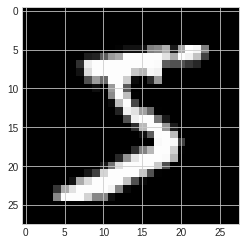

In [68]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [70]:
print(y_train[0])

5


#데이터 전처리 (Data Preprocessing)

In [71]:
def flatten_for_mnist(x):
  temp = np.zeros((x.shape[0], x[0].size))

  for idx, data in enumerate(x):
    temp[idx, :] = data.flatten()

  return temp

In [78]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape, x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy() # One hot encoding
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()   # One hot encoding

print(y_train_ohe.shape, y_test_ohe.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [79]:
# Maximum, minimum 출력
print(x_train[0].max(), x_train[0].min)
print(y_train_ohe[0])

9.274683492658337e-13 <built-in method min of numpy.ndarray object at 0x7f35dba40690>
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Hyper parameter

In [80]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#Util Functions

In [84]:
#Util Functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def MSE(pred_y, true_y):   # Mean Squared Error
  return (np.sum(true_y - pred_y)**2) / pred_y.shape[0]

def CEE(pred_y, true_y):        # Cross Entropy Error
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  return -np.sum(true_y * np.log(pred_y + delta))

def CEE_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def CEE_for_bin(pred_y, true_y):  #Cross Entropy Error for binary
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential(f, x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]
    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val

  return diff_value

def differential_2d(f, X):
  if X.ndim == 1:
    return differential(f, X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = differential(f, x)

    return grad
  

#Two Layer Neural Network 구현

In [85]:
class MyModel():

  def __init__(self):

    def weight_init(input_nodes, hidden_nodes, output_units):
      np.random.seed(777)
      params = {}
      params['w_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
      params['b_1'] = np.zeros(hidden_nodes)
      params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
      params['b_2'] = np.zeros(output_units)
      return params

    self.params = weight_init(784, 64, 10)

  def predict(self, x):
    W_1, W_2 = self.params['w_1'], self.params['w_2']
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W_2) + B_2
    pred_y = softmax(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)
    return CEE_for_bin(pred_y, true_y)

  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y, axis=1)
    t_argmax = np.argmax(true_y, axis=1)

    accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])

    return accuracy

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grads = {}
    grads['w_1'] = differential_2d(loss_grad, self.params['w_1'])
    grads['w_2'] = differential_2d(loss_grad, self.params['w_2'])
    grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
    grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])

    return grads

In [86]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()    # 시간 측정
for i in tqdm(range(epochs)):

  batch_idx = np.random.choice(train_size, batch_size)  # 학습할 batch 선택
  x_batch = x_train[batch_idx]
  y_batch = y_train_ohe[batch_idx]

  grads = model.get_gradient(x_batch, y_batch)  # 각 batch에 대한 gradient 계산

  for key in grads.keys():
    model.params[key] -= lr * grads[key]  # weight, bias update

  loss = model.loss(x_batch, y_batch)     # loss 계산
  train_loss_list.append(loss)            # loss 기록

  #정확도 계산
  train_accuracy = model.accuracy(x_train, y_train_ohe) 
  test_accuracy = model.accuracy(x_test, y_test_ohe)
  train_acc_list.append(train_accuracy)
  test_acc_list.append(test_accuracy)

  print("Epoch: {}, Cost: {}, Train Accuracy: {}, Test Accuracy: {}".format(i+1, loss, train_accuracy, test_accuracy))

  end_time = time.time()

  print("총 학습 소요시간: {:.3f}s".format(end_time - start_time))
                                                                            
                                                                          

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1, Cost: 467.19329271774416, Train Accuracy: 0.10441666666666667, Test Accuracy: 0.1028
총 학습 소요시간: 99.452s
Epoch: 2, Cost: 752.8216563102583, Train Accuracy: 0.09751666666666667, Test Accuracy: 0.0974
총 학습 소요시간: 184.332s


#Model의 결과
- 학습이 잘 되지 않을 수 있음
- 만약, 학습이 잘 되지 않는다면, 학습이 잘 되기 위한 조치를 취해줘야 한다.
